# Load image

In [1]:
%load_ext autoreload
%autoreload 2

In [9]:
import sys
import cv2
import os

from robot_vision.recognition import detection
from robot_vision.recognition import background_subtraction
from robot_vision.recognition import age_gender
from robot_vision.recognition import keypoints
from robot_vision.recognition import facial_expression
from robot_vision.recognition import predefined
from robot_vision.utils import plotting
from robot_vision.utils import preprocessing

predefined.MODELS_FOLDER = '../robot_vision/models'
predefined.USER_FACES_FOLDER = '../robot_vision/user_faces'

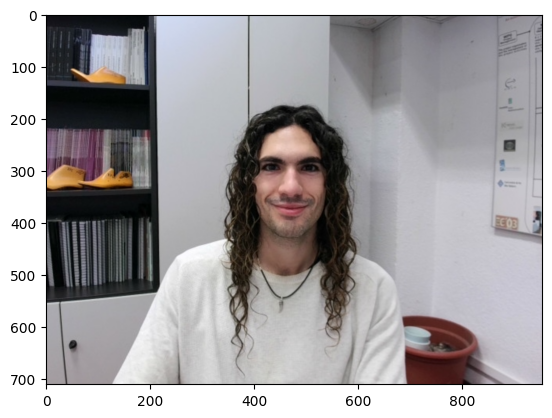

In [10]:
img_path = 'images/happiness.png'
img = cv2.imread(img_path)
plotting.show_img(img)

# Face Detection

## YOLOv8

In [11]:
face_detector = predefined.PREDEFINED_RECOGNIZERS['face_detection']['YOLOv8']()

Model summary (fused): 268 layers, 68125494 parameters, 0 gradients


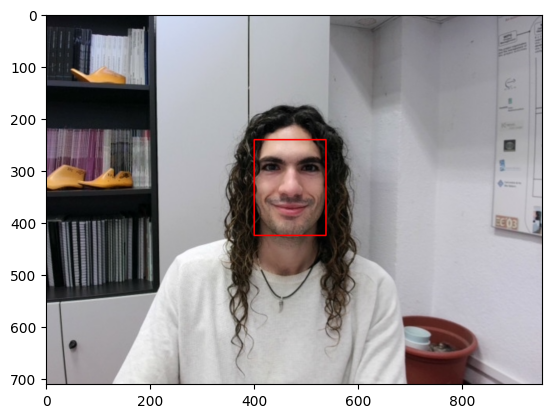

In [12]:
face_bbox = face_detector.get_bbox(img)
plotting.show_img(plotting.draw_detections(img, bbox=face_bbox))

## InsightFace

In [50]:
face_detector = predefined.PREDEFINED_RECOGNIZERS['face_detection']['InsightFace']()

Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
model ignore: C:\Users\Xavi/.insightface\models\buffalo_l\1k3d68.onnx landmark_3d_68
Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
model ignore: C:\Users\Xavi/.insightface\models\buffalo_l\2d106det.onnx landmark_2d_106
Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
find model: C:\Users\Xavi/.insightface\models\buffalo_l\det_10g.onnx detection [1, 3, '?', '?'] 127.5 128.0
Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
model ignore: C:\Users\Xavi/.insightface\models\buffalo_l\genderage.onnx genderage
Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
model ignore: C:\Users\Xavi/.insightface\models\buffalo_l\w600k_r50.onnx recognition
set det-size: (64, 64)


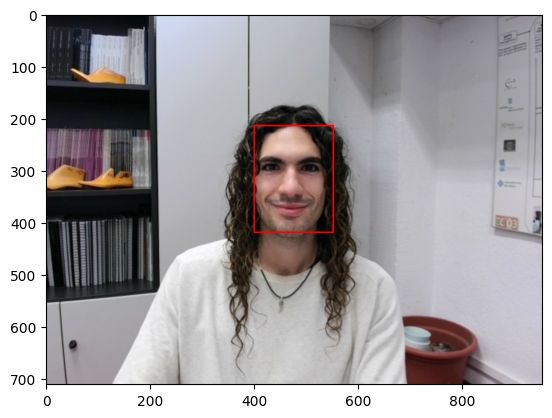

In [51]:
face_bbox = face_detector.get_bbox(img)
plotting.show_img(plotting.draw_detections(img, bbox=face_bbox))

## MTCNN

In [52]:
face_detector = predefined.PREDEFINED_RECOGNIZERS['face_detection']['MTCNN']()

1/1 [==============================] - 0s 94ms/step


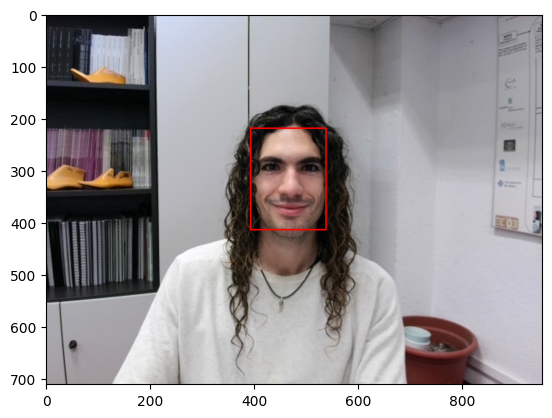

In [53]:
face_bbox = face_detector.get_bbox(img)
plotting.show_img(plotting.draw_detections(img, bbox=face_bbox))

## ViolaJones

In [54]:
face_detector = predefined.PREDEFINED_RECOGNIZERS['face_detection']['ViolaJones']()

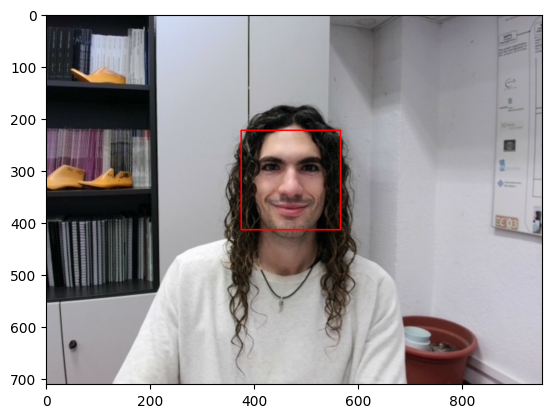

In [55]:
face_bbox = face_detector.get_bbox(img)
plotting.show_img(plotting.draw_detections(img, bbox=face_bbox))

## DLIB

In [56]:
face_detector = predefined.PREDEFINED_RECOGNIZERS['face_detection']['DLIB']()

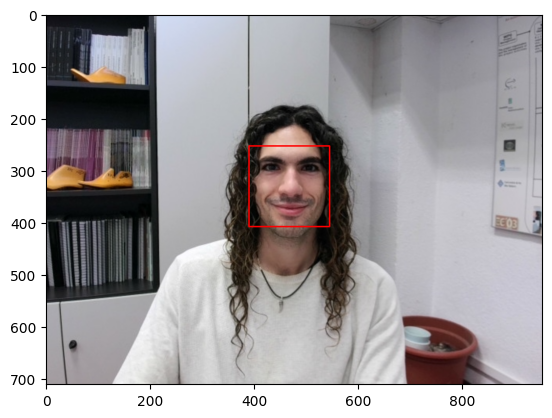

In [57]:
face_bbox = face_detector.get_bbox(img)
plotting.show_img(plotting.draw_detections(img, bbox=face_bbox))

# Person Detection

## YOLOv8

In [58]:
person_detector = predefined.PREDEFINED_RECOGNIZERS['person_detection']['YOLOv8']()

Model summary (fused): 268 layers, 68125494 parameters, 0 gradients


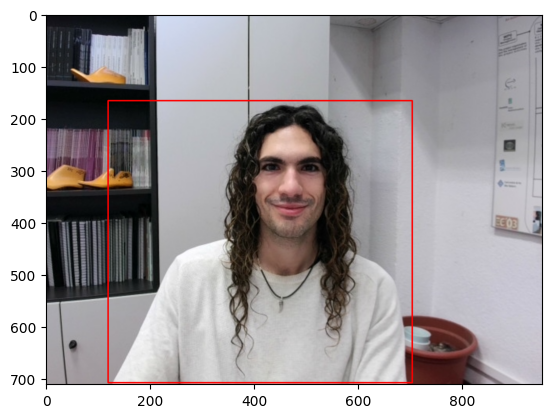

In [59]:
person_bbox = person_detector.get_bbox(img)
plotting.show_img(plotting.draw_detections(img, bbox=person_bbox))

# Face Keypoints Extraction

## SPIGA

In [60]:
keypoints_detector = predefined.PREDEFINED_RECOGNIZERS['keypoints']['SPIGA']()

Model summary (fused): 268 layers, 68125494 parameters, 0 gradients


SPIGA model loaded!


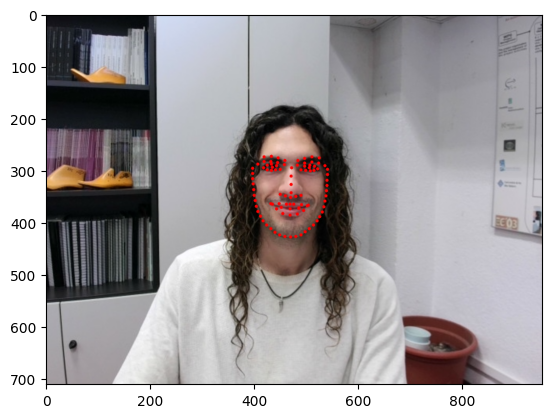

In [61]:
keypoints = keypoints_detector.get_keypoints(img)
plotting.show_img(plotting.draw_detections(img, kps=keypoints))

## InsightFace

In [62]:
keypoints_detector = predefined.PREDEFINED_RECOGNIZERS['keypoints']['InsightFace']()

Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
model ignore: C:\Users\Xavi/.insightface\models\buffalo_l\1k3d68.onnx landmark_3d_68
Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
find model: C:\Users\Xavi/.insightface\models\buffalo_l\2d106det.onnx landmark_2d_106 ['None', 3, 192, 192] 0.0 1.0
Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
find model: C:\Users\Xavi/.insightface\models\buffalo_l\det_10g.onnx detection [1, 3, '?', '?'] 127.5 128.0
Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
model ignore: C:\Users\Xavi/.insightface\models\buffalo_l\genderage.onnx genderage
Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
model ignore: C:\Users\Xavi/.insightface\models\buffalo_l\w600k_r50.onnx recognition
set det-size: (64, 64)


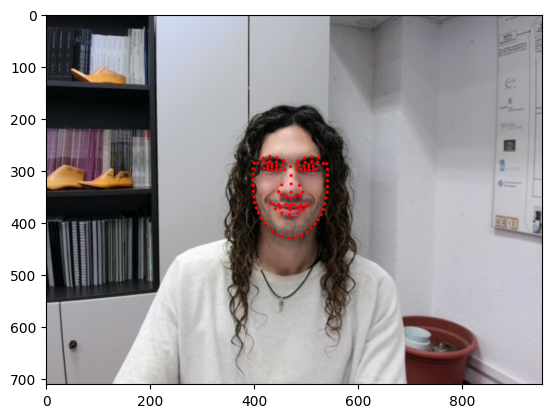

In [63]:
keypoints = keypoints_detector.get_keypoints(img)
plotting.show_img(plotting.draw_detections(img, kps=keypoints))

## MTCNN

In [64]:
keypoints_detector = predefined.PREDEFINED_RECOGNIZERS['keypoints']['MTCNN']()

1/1 [==============================] - 0s 96ms/step


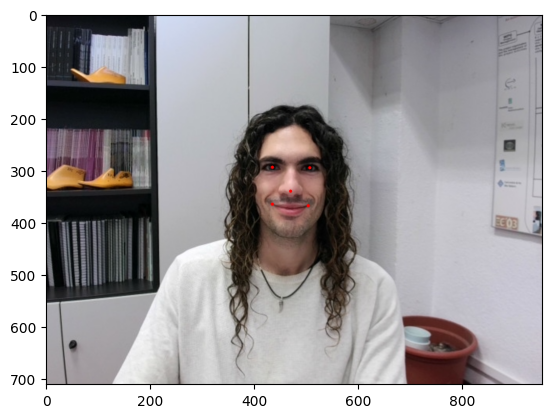

In [65]:
keypoints = keypoints_detector.get_keypoints(img)
plotting.show_img(plotting.draw_detections(img, kps=keypoints))

## ViolaJones (eyes)

In [66]:
keypoints_detector = predefined.PREDEFINED_RECOGNIZERS['keypoints']['ViolaJones']()

More than two eyes detected


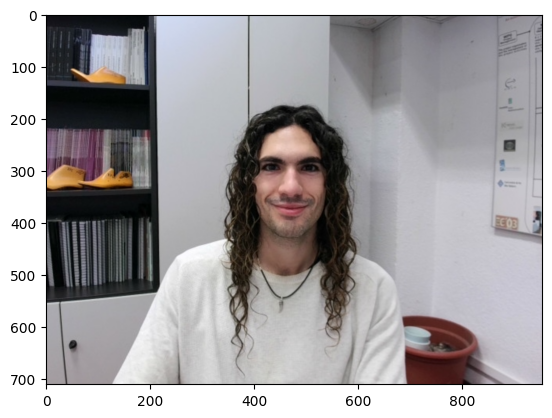

In [67]:
keypoints = keypoints_detector.get_keypoints(img)
plotting.show_img(plotting.draw_detections(img, kps=keypoints))

## DLIB

In [68]:
keypoints_detector = predefined.PREDEFINED_RECOGNIZERS['keypoints']['DLIB']()

Model summary (fused): 268 layers, 68125494 parameters, 0 gradients


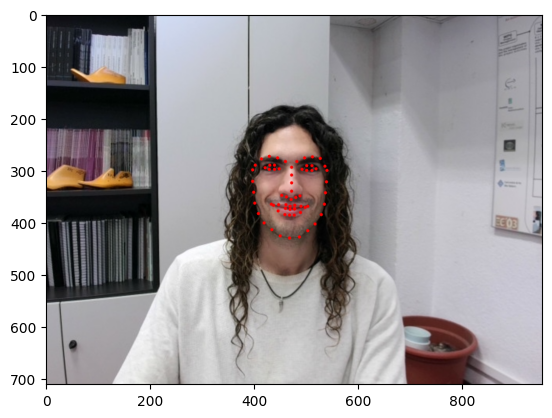

In [69]:
keypoints = keypoints_detector.get_keypoints(img)
plotting.show_img(plotting.draw_detections(img, kps=keypoints))

# Facial Expression Recognition

## Custom networks with Keras

In [70]:
facial_expression_recognizer = predefined.PREDEFINED_RECOGNIZERS['expression']['AlexNet']()

Model summary (fused): 268 layers, 68125494 parameters, 0 gradients


SPIGA model loaded!


1/1 [==============================] - 0s 72ms/step


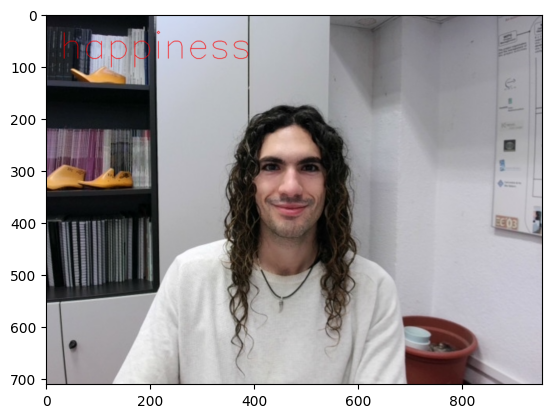

In [71]:
expression = facial_expression_recognizer.get_facial_expression(img)
plotting.show_img(plotting.draw_detections(img, expression=expression))

# Age & Gender estimation

## InsightFace

In [74]:
age_gender_detector = predefined.PREDEFINED_RECOGNIZERS['age_gender']['InsightFace']()

Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
model ignore: C:\Users\Xavi/.insightface\models\buffalo_l\1k3d68.onnx landmark_3d_68
Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
model ignore: C:\Users\Xavi/.insightface\models\buffalo_l\2d106det.onnx landmark_2d_106
Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
find model: C:\Users\Xavi/.insightface\models\buffalo_l\det_10g.onnx detection [1, 3, '?', '?'] 127.5 128.0
Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
find model: C:\Users\Xavi/.insightface\models\buffalo_l\genderage.onnx genderage ['None', 3, 96, 96] 0.0 1.0
Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
model ignore: C:\Users\Xavi/.insightface\models\buffalo_l\w600k_r50.onnx recognition
set det-size: (64, 64)


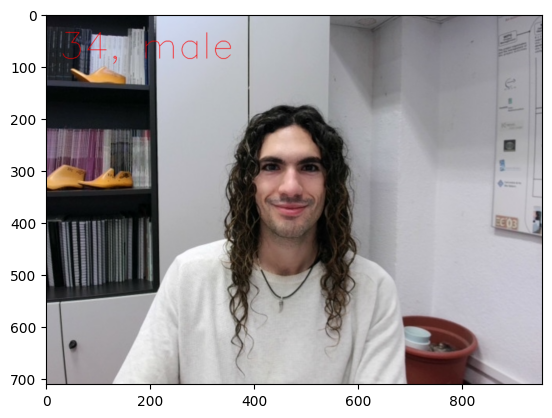

In [75]:
age, gender = age_gender_detector.get_age_gender(img)
plotting.show_img(plotting.draw_detections(img, age=age, gender=gender))

## MiVOLO

In [8]:
age_gender_detector = predefined.PREDEFINED_RECOGNIZERS['age_gender']['MiVOLO']()

Model summary (fused): 268 layers, 68125494 parameters, 0 gradients


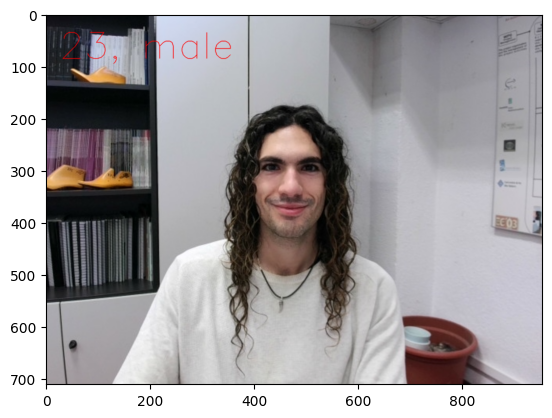

In [9]:
age, gender = age_gender_detector.get_age_gender(img)
plotting.show_img(plotting.draw_detections(img, age=age, gender=gender))

# Face recognition

Faces found in "robot_vision/user_faces".

## InsightFace

In [82]:
face_recognizer = predefined.PREDEFINED_RECOGNIZERS['face_recognition']['InsightFace']()

Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
model ignore: C:\Users\Xavi/.insightface\models\buffalo_l\1k3d68.onnx landmark_3d_68
Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
model ignore: C:\Users\Xavi/.insightface\models\buffalo_l\2d106det.onnx landmark_2d_106
Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
find model: C:\Users\Xavi/.insightface\models\buffalo_l\det_10g.onnx detection [1, 3, '?', '?'] 127.5 128.0
Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
model ignore: C:\Users\Xavi/.insightface\models\buffalo_l\genderage.onnx genderage
Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
find model: C:\Users\Xavi/.insightface\models\buffalo_l\w600k_r50.onnx recognition ['None', 3, 112, 112] 127.5 127.5
set det-size: (64, 64)
19 identities initialized.


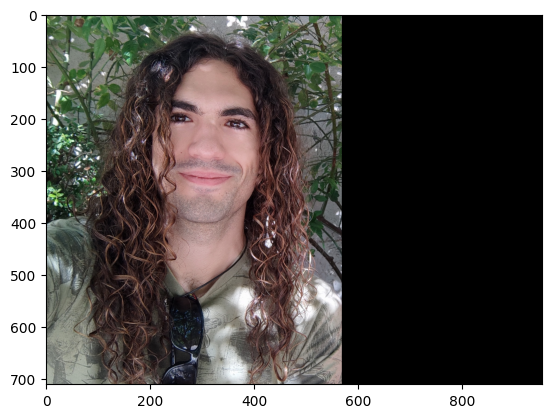

In [83]:
similar_img_name = face_recognizer.recognize(img)
plotting.show_img(plotting.draw_detections(img, user_face=similar_img_name))

# Background Subtraction

## RemBG

In [84]:
background_subtractor = predefined.PREDEFINED_RECOGNIZERS['background_subtraction']['RemBG']()

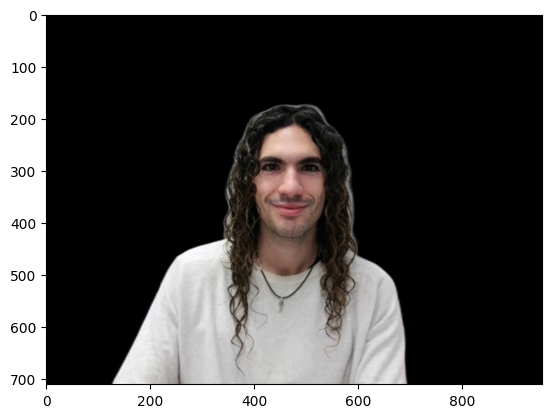

In [85]:
background = background_subtractor.remove_background(img)
plotting.show_img(background)